In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [3]:
def get_all_columns(df):
    """Get all column names.
    Args:
        df(DataFrame): Pandas DataFrame.
    Returns:
         A list of all column names.
    """
    columns = df.columns.tolist()
    return columns

def get_feature_columns(df):
    """Get feature column names 
    Args:
        df(DataFrame): Pandas DataFrame
    Returns:
        A list of feature column names.
    """
    columns = df.columns.tolist()
    feature_columns = columns[:-1]
    return feature_columns

def get_target_column(df):
    """Get a target column name
    Args:
        df(DataFrame): Pandas DataFrame
    Returns:
        A list of the target column name.
    """
    columns = df.columns.tolist()
    target_col = columns[-1]
    return target_col

In [4]:
pd.set_option("display.max_columns", 50)

In [5]:
df = pd.read_csv('data_processed/df_dropNaN2.csv')

In [6]:
df

,Pregnant,Glucose,Diastolic_BP,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...
719,10.0,101.0,76.0,32.9,0.171,63,0.0
720,2.0,122.0,70.0,36.8,0.340,27,0.0
721,5.0,121.0,72.0,26.2,0.245,30,0.0
722,1.0,126.0,60.0,30.1,0.349,47,1.0


In [7]:
df["Class"].value_counts()

0.0    475
1.0    249
Name: Class, dtype: int64

In [8]:
all_cols = get_all_columns(df)
#all_cols

In [9]:
feature_cols = get_all_columns(df)
#feature_cols

In [10]:
target_col = get_target_column(df)
#target_col

In [11]:
to_scale = ["Glucose", "Diastolic_BP", "BMI"]
to_log = ["Pregnant", "Diabetes_Pedigree", "Age"]

## 1. Base 
- Not Scale
- Not Tunning

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df[target_col], test_size=0.2, random_state=2)

In [13]:
X_train

,Pregnant,Glucose,Diastolic_BP,BMI,Diabetes_Pedigree,Age,Class
203,12.0,151.0,70.0,41.8,0.742,38,1.0
275,0.0,107.0,62.0,36.6,0.757,25,1.0
499,1.0,86.0,66.0,41.3,0.917,29,0.0
694,2.0,99.0,60.0,36.6,0.453,21,0.0
377,6.0,137.0,61.0,24.2,0.151,55,0.0
...,...,...,...,...,...,...,...
534,0.0,121.0,66.0,34.3,0.203,33,1.0
584,0.0,94.0,70.0,43.5,0.347,21,0.0
493,1.0,97.0,64.0,18.2,0.299,21,0.0
527,1.0,87.0,68.0,37.6,0.401,24,0.0


In [14]:
X_test

,Pregnant,Glucose,Diastolic_BP,BMI,Diabetes_Pedigree,Age,Class
664,9.0,164.0,78.0,32.8,0.148,45,1.0
391,3.0,173.0,84.0,35.7,0.258,22,1.0
597,5.0,104.0,74.0,28.8,0.153,48,0.0
335,12.0,88.0,74.0,35.3,0.378,48,0.0
37,3.0,180.0,64.0,34.0,0.271,26,0.0
...,...,...,...,...,...,...,...
236,1.0,111.0,86.0,30.1,0.143,23,0.0
501,0.0,105.0,90.0,29.6,0.197,46,0.0
185,3.0,107.0,62.0,22.9,0.678,23,1.0
700,13.0,153.0,88.0,40.6,1.174,39,0.0


In [15]:
y_train.value_counts()

0.0    378
1.0    201
Name: Class, dtype: int64

In [16]:
y_test.value_counts()

0.0    97
1.0    48
Name: Class, dtype: int64

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
lr_base = LogisticRegression()
lr_base.fit(X_train, y_train)
lr_base_pred = lr_base.predict(X_test)

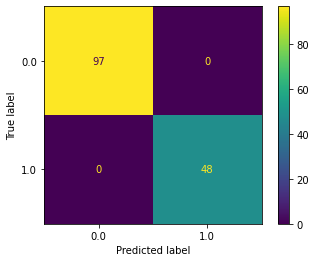

In [19]:
plot_confusion_matrix(lr_base, X_test, y_test)

In [20]:
print(classification_report(y_test,lr_base_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        97
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



### 2. Scale

In [21]:
df = pd.read_csv('data_processed/df_dropNaN2.csv')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df[target_col], test_size=0.2, random_state=2)

In [23]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [24]:
lr_scale = LogisticRegression()

lr_scale.fit(X_train_scale, y_train)
lr_scale_pred = lr_scale.predict(X_test_scale)

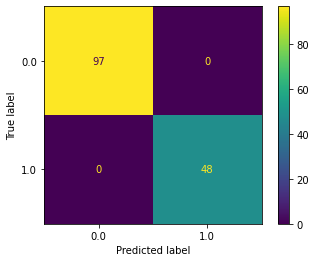

In [25]:
plot_confusion_matrix(lr_scale, X_test_scale, y_test)

In [26]:
print(classification_report(y_test,lr_scale_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        97
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier 

In [28]:
df = pd.read_csv('data_processed/df_dropNaN2.csv')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df[target_col], test_size=0.2, random_state=2)

In [30]:
y_train.value_counts()

0.0    378
1.0    201
Name: Class, dtype: int64

In [31]:
y_test.value_counts()

0.0    97
1.0    48
Name: Class, dtype: int64

In [32]:
rf_base = RandomForestClassifier()
rf_base.fit(X_train, y_train)
rf_base_pred = rf_base.predict(X_test)

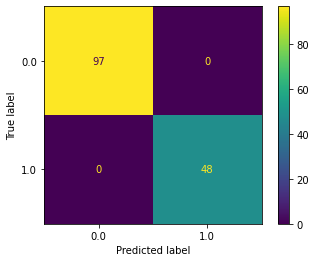

In [33]:
plot_confusion_matrix(rf_base, X_test, y_test)

In [34]:
print(classification_report(y_test, rf_base_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        97
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145

